# Python and R

In [92]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# show all columns on pandas dataframes
pd.set_option('display.max_columns', None)


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [94]:
%%R

# My commonly used R imports

require('tidyverse')



# Read the data



The cell below loads the data in python:

In [95]:
df = pd.read_csv('raw-polls.csv')
df.sample(5)

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
754,6338,30987,1701,2000,2000_Sen-G_NJ,NJ,Sen-G,Sen-G,Monmouth University,215,Live Phone,NaN,10/27/00,575.0,Jon Stevens Corzine,3786,DEM,39.0,Bob Franks,3787,REP,35.0,NaN,4.0,11/7/00,50.11,47.10,3.02,0.98,1.0,NaN
3143,24279,29517,1598,2006,2006_Sen-G_NJ,NJ,Sen-G,Sen-G,Gallup,112,Live Phone,NaN,11/2/06,654.0,Robert Menendez,2971,DEM,50.0,Thomas H. Kean,2972,REP,40.0,NaN,10.0,11/7/06,57.20,41.19,16.02,-6.02,1.0,NaN
4560,64014,117821,4427,2008,2008_House-G_UT-3,UT-3,House-G,House-G,Dan Jones & Associates,70,Live Phone,NaN,10/27/08,383.0,Bennion L. Spencer,13893,DEM,24.0,Jason Chaffetz,13892,REP,58.0,NaN,-34.0,11/4/08,28.28,65.61,-37.33,3.33,1.0,NaN
4121,16747,21676,753,2008,2008_Pres-G_WV,WV,Pres-G,Pres-G,CNN/Opinion Research Corp.,37,Live Phone,NaN,10/20/08,674.0,Barack Obama,41,DEM,42.5,John McCain,44,REP,53.0,2.0,-10.5,11/4/08,42.59,55.71,-13.12,2.62,1.0,for CNN; average of multiple versions or turno...
5425,32656,39252,1508,2010,2010_Sen-G_AZ,AZ,Sen-G,Sen-G,Public Policy Polling,263,IVR,NaN,10/24/10,664.0,Rodney Britz Glassman,2280,DEM,38.0,John McCain,599,REP,56.0,NaN,-18.0,11/2/10,34.65,58.86,-24.21,6.21,1.0,NaN


The cell below loads the same data in R:

In [96]:
%%R

df <- read_csv('raw-polls.csv')

df

Rows: 10776 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): race, location, type_simple, type_detail, pollster, methodology, p...
dbl (17): poll_id, question_id, race_id, year, pollster_rating_id, samplesiz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 10,776 × 31
   poll_id questio…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1   26013     87909    1455  1998 1998… NY      Gov-G   Gov-G   Blum &…      32
 2   26255     87926    1456  1998 1998… OH      Gov-G   Gov-G   Univer…     346
 3   26026     31266    1736  1998 1998… NV      Sen-G   Sen-G   FM3 Re…      91
 4   26013     31253    1738  1998 1998… NY      Sen-G   Sen-G   Blum &…      32
 5   63632    117103    1738  1998 1998… NY      Sen-G 

# Guided Exploration

In this section you'll make a few charts to explore the data. Here I will raise some questions for you to dig around in the data and answer. You can use summary statistics and/or charts to help answer the questions. You will have to make some methodological choices along the way. Be aware of what choices you're making! I'll ask you about them shortly.


## Question 1: How accurate are polls from the following pollsters?
Characterize the accuracy of each of these pollsters in a sentence or two. Then, write another few sentences justifying your characterization with insights from the data.
- Siena College/The New York Times Upshot
- Jayhawk Consulting
- Fox News/Beacon Research/Shaw & Co. Research
- Brown University
- American Research Group


👉 **Siena College/The New York Times Upshot** 



In [97]:
%%R

siena <- df %>%
    filter(pollster=='Siena College/The New York Times Upshot')

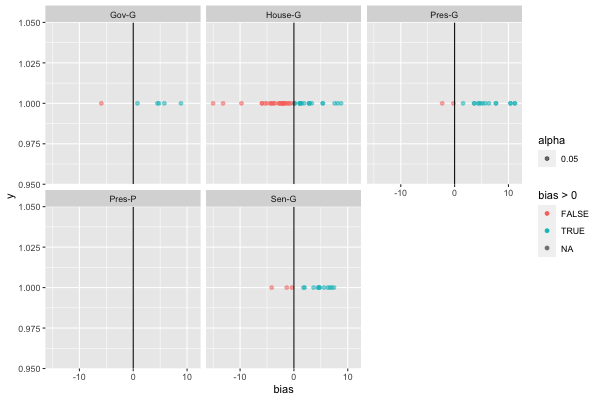

In [98]:
%%R -h 400 -w 600

ggplot(siena, aes(x=bias)) +
    aes(x=bias, y=1, color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0)) +
    facet_wrap(~type_simple)

In [99]:
%%R 

siena$bias %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-15.010  -2.075   1.515   1.423   5.125  11.200       1 


👉 **Jayhawk Consulting**

In [100]:
%%R

jayhawk <- df %>%
    filter(pollster=='Jayhawk Consulting Services')

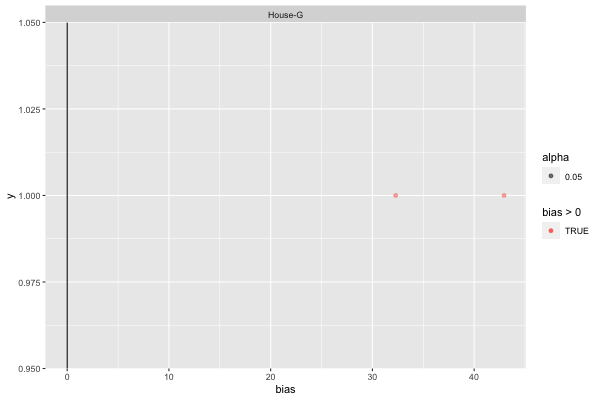

In [101]:
%%R -h 400 -w 600

ggplot(jayhawk, aes(x=bias)) +
    aes(x=bias, y=1, color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0)) +
    facet_wrap(~type_simple)

In [102]:
%%R 

jayhawk$bias %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  32.29   34.95   37.62   37.62   40.28   42.94 


👉 **Fox News/Beacon Research/Shaw & Co. Research**

In [103]:
%%R

fox_beacon <- df %>%
    filter(pollster=='Fox News/Beacon Research/Shaw & Co. Research')

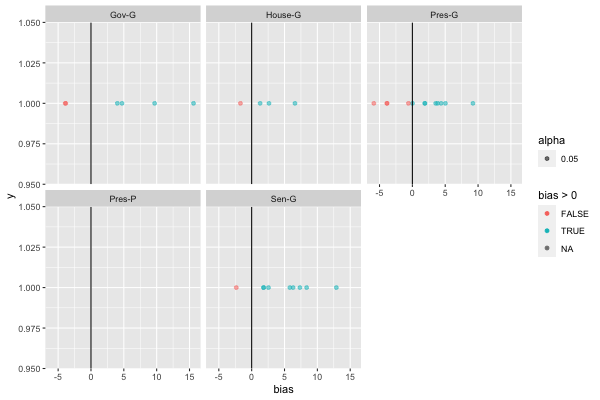

In [113]:
%%R -h 400 -w 600

ggplot(fox_beacon, aes(x=bias)) +
    aes(x=bias, y=1, color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0)) +
    facet_wrap(~type_simple)

In [105]:
%%R 

fox_beacon$bias %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -5.870  -0.290   2.630   3.073   6.060  15.610      15 


👉 **Brown University**

In [106]:
%%R

brown <- df %>%
    filter(pollster=='Brown University') 

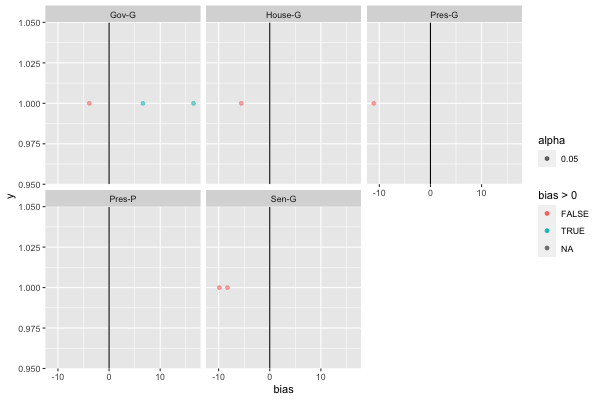

In [107]:
%%R -h 400 -w 600

ggplot(brown, aes(x=bias)) +
    aes(x=bias, y=1, color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0)) +
    facet_wrap(~type_simple)

In [108]:
%%R 

brown$bias %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-11.080  -9.060  -5.570  -2.213   1.380  16.520       5 


👉 **American Research Group**

In [109]:
%%R

arg <- df %>%
    filter(pollster=='American Research Group')

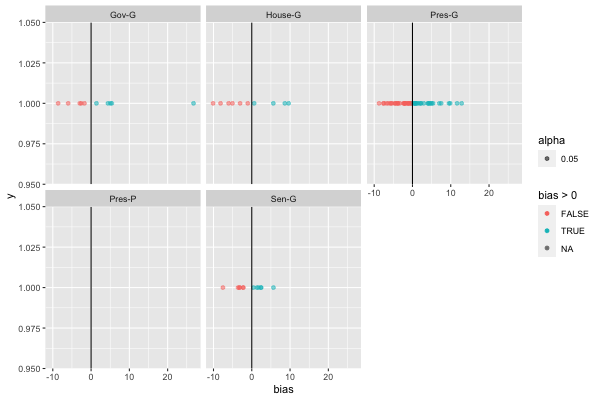

In [110]:
%%R -h 400 -w 600

ggplot(arg, aes(x=bias)) +
    aes(x=bias, y=1, color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0)) +
    facet_wrap(~type_simple)

In [111]:
%%R 

arg$bias %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-10.100  -3.502  -0.560   0.113   2.825  26.760     191 


### Question 2: Which pollsters are the most accurate? Which are the least accurate?

👉 Which pollsters are the most accurate?

👉 Which are the least accurate?

### Question 2 Reflections

👉 Write a summary paragraph explaining how you decided what constitutes “most accurate” and "least accurate"?


👉 In bullet point form, name **methodological choices** you made in the process of determining which pollsters were the most and least accurate.


👉 In bullet point form, list the **limitations** of your approach 
